In [1]:
import pandas as pd
import numpy as np

In [2]:
path="D:/SRP/raw_data.xlsx"
raw_data=pd.read_excel(path,header=1)

In [3]:
raw_data.info()
col=len(raw_data.columns)
density=raw_data['DENSITY']
components=raw_data.iloc[:,1:(col-1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64481 entries, 0 to 64480
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DENSITY  64481 non-null  float64
 1   SIO2     64481 non-null  float64
 2   AL2O3    64481 non-null  float64
 3   B2O3     64481 non-null  float64
 4   CAO      64481 non-null  float64
 5   K2O      64481 non-null  float64
 6   NA2O     64481 non-null  float64
 7   PBO      64481 non-null  float64
 8   Li2O     64481 non-null  float64
 9   MgO      64481 non-null  float64
 10  SRO      64481 non-null  float64
 11  BAO      64481 non-null  float64
 12  ZNO      64481 non-null  int64  
 13  P2O5     64481 non-null  float64
 14  GEO2     64481 non-null  float64
 15  ZRO2     64481 non-null  float64
 16  TIO2     64481 non-null  float64
 17  TEO2     64481 non-null  int64  
 18  FemOn    64481 non-null  float64
 19  AsmOn    64481 non-null  int64  
 20  Bi2O3    64481 non-null  float64
 21  RF       644

In [4]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(components,density,test_size=0.2,random_state=123)

In [5]:
# K临近回归
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[2.41000009 5.35599995 2.44799995 ... 2.46000004 2.54799998 2.71300006]


In [7]:
# AdaBoost回归
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(random_state=123)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[3.0220372  5.10339747 3.0220372  ... 3.0220372  3.0220372  3.08389383]


In [9]:
# GBDT回归
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(random_state=123)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[2.49313515 5.27201183 2.45368705 ... 2.48299122 2.5688597  2.84869646]


In [5]:
# XGBoost回归
!pip install xgboost 
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[2.4559138 5.120841  2.4213917 ... 2.4538283 2.5687966 2.803383 ]


In [11]:
# 随机森林回归
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10,random_state=123)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[2.39450004 5.43684001 2.43539999 ... 2.46200004 2.57709997 2.86887629]


In [9]:
# !pip install lightgbm
from lightgbm import LGBMRegressor
model=LGBMRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[2.45603647 5.24324468 2.4123017  ... 2.45583454 2.57631525 2.79114532]


In [33]:
a=pd.DataFrame()
a['预测值']=list(y_pred)
a['实际值']=list(y_test)
print(a)

            预测值    实际值
0      2.455914  2.390
1      5.120841  5.209
2      2.421392  2.440
3      2.555190  2.530
4      5.690684  4.805
...         ...    ...
12892  5.111351  6.200
12893  2.783301  2.906
12894  2.453828  2.460
12895  2.568797  2.555
12896  2.803383  2.904

[12897 rows x 2 columns]


In [34]:
from sklearn.metrics import explained_variance_score
score=explained_variance_score(y_pred,y_test)
print(score)

0.9473236459587775


In [10]:
score = model.score(X_test, y_test)
print('模型得分:', score)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

模型得分: 0.9407261952154482
Mean Absolute Error: 0.13923028100957116
Mean Squared Error: 0.0810893255307031
Root Mean Squared Error: 0.28476187513552986


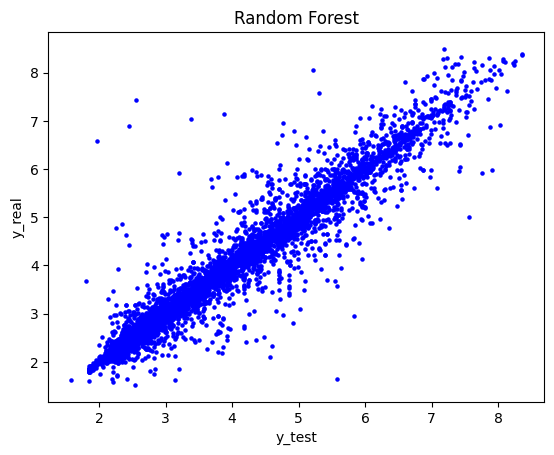

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test,c='blue',label='function',s=5)
# plt.legend()
plt.xlabel('y_test')
plt.ylabel('y_real')
plt.title('Random Forest')
plt.savefig('./show.png')
plt.show()

In [37]:
y_true = np.array(y_test)
y_pred = np.array(y_pred)
r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
print(r2) # 相关系数

0.950163333172654
